In [3]:
import keras
import pandas as pd
from keras import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,Conv1D,MaxPooling1D
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from bs4 import BeautifulSoup
import re,json
%matplotlib inline

In [4]:
def preprocess(text):
    text=BeautifulSoup(text.lower(),"html5lib").text
    text=re.sub(r"[\W]+"," ",text)
    return text

In [7]:
with open("../../data/imdb-comments.json",mode='r',encoding='utf-8') as f:
    print(f)
    comments=pd.DataFrame.from_dict([json.loads(l) for l in f])
    comments['content']=comments['content'].apply(preprocess)

<_io.TextIOWrapper name='../../data/imdb-comments.json' mode='r' encoding='utf-8'>


In [8]:
comments.sample(5)

,content,label,name,sentiment
3398,this typical teenagers movie is one of the bes...,test,1809_7.txt,pos
21951,i got hold of a discount copy of this i had se...,test,7257_4.txt,neg
35703,i read somewhere in a fairly panning review th...,train,8384_7.txt,pos
21208,first i m sorry for my english second the true...,test,6589_2.txt,neg
39904,this movie is not good the first one almost su...,train,12164_1.txt,neg


In [9]:
y=np.where(comments['sentiment']=='pos',1,0)
y

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
x_train=comments['label']=='train'

In [12]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(comments.content)

In [13]:
doc_terms=tokenizer.texts_to_sequences(comments.content)

In [15]:
print(doc_terms[0])

[9, 416, 2, 210, 10, 15, 238, 311, 100, 109, 28203, 5, 33, 3, 173, 352, 4, 1758, 9, 232, 975, 11, 9, 13, 5735, 5, 65, 7, 84, 37, 47, 9, 672, 4, 9942, 9315, 24, 13, 62, 477, 5, 78, 201, 9, 13, 356, 9315, 254, 1, 104, 4, 3373, 15901, 53, 69, 2, 1621, 7132, 254, 1155, 8399, 17, 139, 11306, 1, 2016, 4, 3, 49, 15, 6, 11, 7, 50, 2970, 17, 258, 1334, 10, 28, 117, 619, 11, 1, 442, 764, 61, 13, 2986, 43, 13, 3232, 33, 2142, 303, 1, 88, 304, 4, 1, 15, 2, 71, 1649, 5, 1716, 303, 1, 338, 304, 136, 11778, 1, 764, 9, 23, 62, 210, 107, 362, 8, 1716, 18, 107, 364, 2061, 339, 14, 69, 264, 2816, 23, 5, 276, 246, 65, 92, 2488, 10, 15, 13, 80, 2, 9, 1466, 11, 20, 141, 65, 7, 161, 20, 1671]


In [16]:
print(comments['content'][0])

i went and saw this movie last night after being coaxed to by a few friends of mine i ll admit that i was reluctant to see it because from what i knew of ashton kutcher he was only able to do comedy i was wrong kutcher played the character of jake fischer very well and kevin costner played ben randall with such professionalism the sign of a good movie is that it can toy with our emotions this one did exactly that the entire theater which was sold out was overcome by laughter during the first half of the movie and were moved to tears during the second half while exiting the theater i not only saw many women in tears but many full grown men as well trying desperately not to let anyone see them crying this movie was great and i suggest that you go see it before you judge 


In [21]:
tokenizer.word_index

{'disposition': 15052,
 'arzenta': 28124,
 'giacomo': 24305,
 'ripa': 39797,
 'panino': 43081,
 'fluffy': 11749,
 'barbells': 95993,
 'medicinal': 37314,
 'griffen': 51025,
 'hijinks': 16489,
 'pinetrees': 97247,
 'blankness': 66850,
 'magnoli': 93061,
 'allures': 53439,
 'ventriloquist': 25487,
 'urchins': 37941,
 'theface': 77203,
 'dismay': 13205,
 'mideval': 81323,
 'owsley': 37241,
 'egoist': 49304,
 'chicha': 76525,
 'cholate': 86648,
 'concurrence': 85979,
 'lactée': 53651,
 'expected': 853,
 'wrenching': 5818,
 'heroinenan': 64041,
 'hickson': 27030,
 'lloyd': 2809,
 'millstead': 78536,
 'pocketbook': 59454,
 'ohad': 36286,
 'culminating': 10210,
 'saphead': 88772,
 'starry': 22990,
 'bobbies': 43889,
 'drecky': 60060,
 'vaster': 92122,
 'lampoonery': 60015,
 'armorer': 72074,
 'granddaughter': 10762,
 'humanimal': 88322,
 'bound': 2749,
 'beckoning': 53262,
 'feil': 78026,
 'sclerotic': 77799,
 'mispronounce': 101749,
 'bloopers': 21383,
 'eurovision': 23700,
 'appelonia': 930

In [22]:
words_by_index = dict([(i, word) for word, i in tokenizer.word_index.items()])

In [23]:
print([words_by_index[t] for t in doc_terms[0]])

['i', 'went', 'and', 'saw', 'this', 'movie', 'last', 'night', 'after', 'being', 'coaxed', 'to', 'by', 'a', 'few', 'friends', 'of', 'mine', 'i', 'll', 'admit', 'that', 'i', 'was', 'reluctant', 'to', 'see', 'it', 'because', 'from', 'what', 'i', 'knew', 'of', 'ashton', 'kutcher', 'he', 'was', 'only', 'able', 'to', 'do', 'comedy', 'i', 'was', 'wrong', 'kutcher', 'played', 'the', 'character', 'of', 'jake', 'fischer', 'very', 'well', 'and', 'kevin', 'costner', 'played', 'ben', 'randall', 'with', 'such', 'professionalism', 'the', 'sign', 'of', 'a', 'good', 'movie', 'is', 'that', 'it', 'can', 'toy', 'with', 'our', 'emotions', 'this', 'one', 'did', 'exactly', 'that', 'the', 'entire', 'theater', 'which', 'was', 'sold', 'out', 'was', 'overcome', 'by', 'laughter', 'during', 'the', 'first', 'half', 'of', 'the', 'movie', 'and', 'were', 'moved', 'to', 'tears', 'during', 'the', 'second', 'half', 'while', 'exiting', 'the', 'theater', 'i', 'not', 'only', 'saw', 'many', 'women', 'in', 'tears', 'but', 'ma

In [24]:
vocab_size = len(tokenizer.word_index)
vocab_size

103890

In [25]:
len(words_by_index)

103890

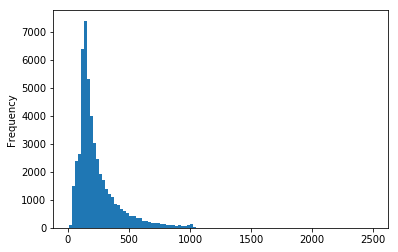

In [26]:
pd.Series([len(r) for r in doc_terms]).plot.hist(bins = 100)

In [27]:
maxlen = 1000
doc_terms_padded = pad_sequences(doc_terms, maxlen=maxlen)
doc_terms_padded[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [28]:
tf.set_random_seed(1)
np.random.seed(1)
 
model=Sequential()
model.add(Embedding(vocab_size+1,10,input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='tanh'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(128, 3, activation='tanh'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(121))
model.add(Dense(400, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(doc_terms_padded[x_train], y[x_train]
        #  , validation_data=(doc_terms_padded[~x_train], y[~x_train])
          , batch_size=64
          , epochs=5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 10)          1038910   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 10)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 64)           3264      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 249, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 247, 128)          24704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 61, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 121)               121000    
__________